In [1]:
import sys
# Append the previous directory to the path
sys.path.append('../')

In [2]:
import numpy as np
import pandas as pd
from exp_utils import CounterPlotNice
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Download wine dataset
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

# Read wine dataset
wine = pd.read_csv('winequality-red.csv', sep=';')

X, y = wine.drop('quality', axis=1), wine['quality']

# Transform X to numpy
X  = X.to_numpy()
# Transform y to binary
y = np.where(y > 5, 1, 0)

--2023-05-08 13:12:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv.1’

winequality-red.csv 100%[===================>]  82.23K   247KB/s    in 0.3s    

2023-05-08 13:12:38 (247 KB/s) - ‘winequality-red.csv.1’ saved [84199/84199]



In [4]:
# Make RF model for noisy dataset
model = RandomForestClassifier(random_state=42)

In [5]:
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [6]:
exp_nice = CounterPlotNice(
    predict_fn=model.predict_proba,
    X_train=X,
    y_train=y,
    cat_feat=[])

In [7]:
# Select case with negative countershapley value
x_cs = exp_nice.explain(np.array([X[533]]))

In [8]:
# Show countershapley values
x_cs[0].countershapley_values()

{'feature_names': ['f5', 'f9', 'f4', 'f6', 'f8', 'f7', 'f3'],
 'feature_values': (0.1625,
  0.12916666666666668,
  0.07083333333333335,
  0.043333333333333335,
  0.03333333333333333,
  0.023333333333333338,
  -0.032499999999999994),
 'feature_indices': (4, 8, 3, 5, 7, 6, 2)}

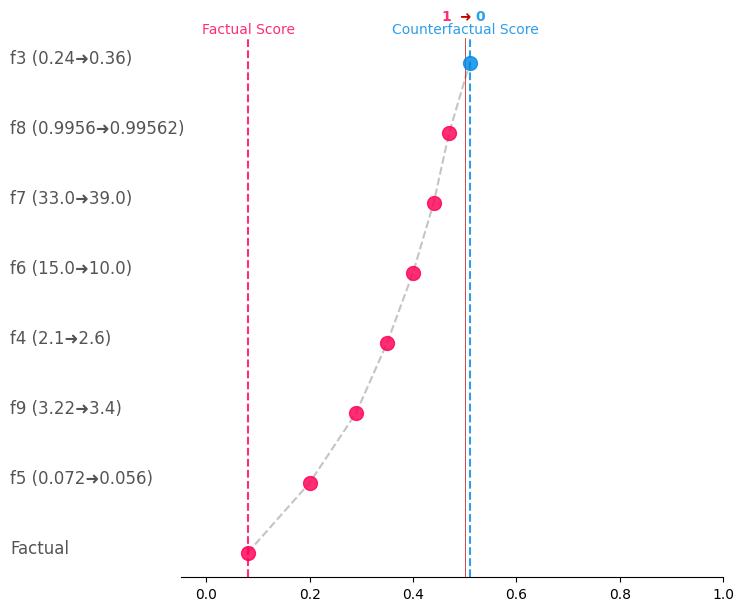

In [9]:
# Plot the greedy chart
x_cs[0].greedy()

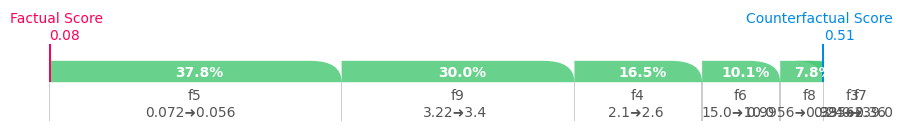

In [10]:
# Plot the countershapley chart
x_cs[0].countershapley()

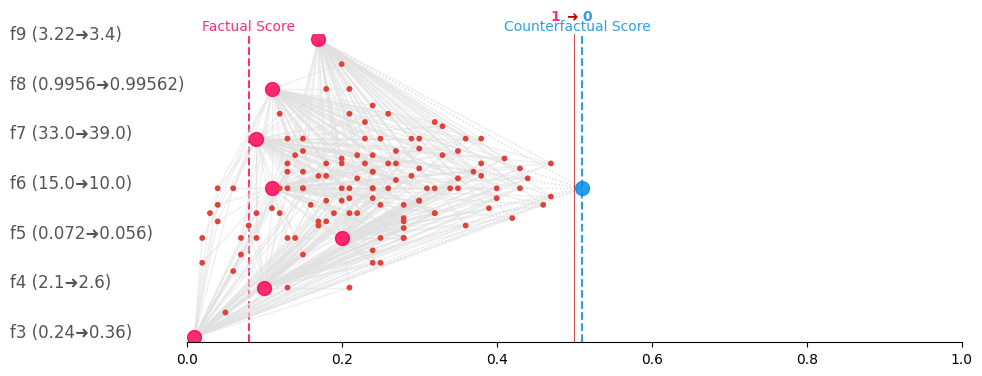

In [11]:
# Plot the constellation chart
x_cs[0].constellation()